<a href="https://colab.research.google.com/github/bellonbits/Deep-Learning-Projects/blob/main/GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Input

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
file_path = '/content/drive/MyDrive/GDP.csv'
df = pd.read_csv(file_path)

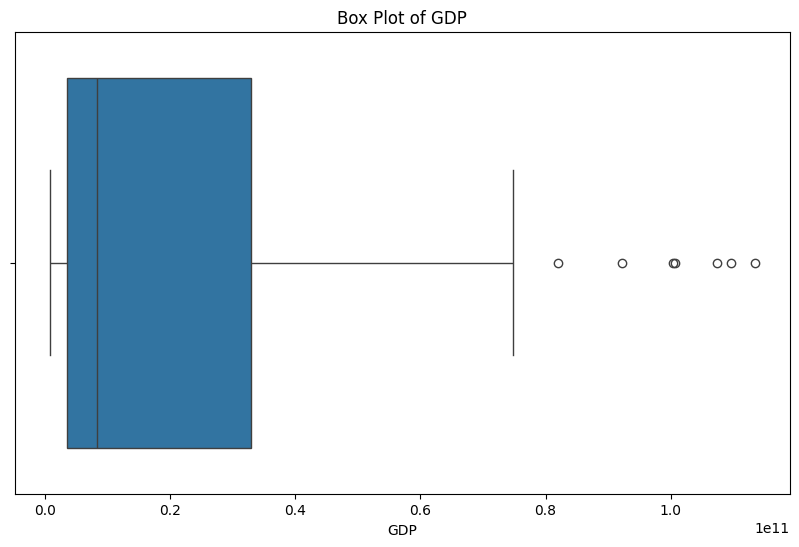

In [35]:
import seaborn as sns

# Box plot of GDP values
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GDP'])
plt.title('Box Plot of GDP')
plt.show()

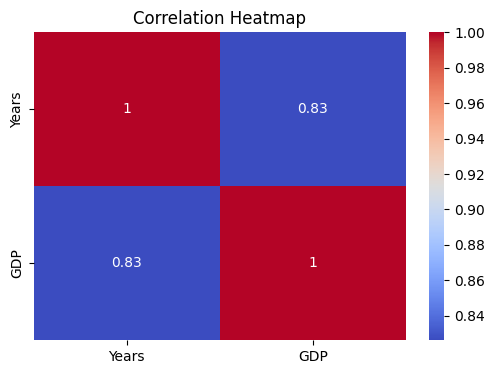

In [36]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['GDP'].values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences from the GDP data
seq_length = 5  # Using the past 5 years to predict the next year
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Prepare the data for prediction until 2027
years_extended = np.arange(df['Years'].iloc[-1] + 1, 2028).reshape(-1, 1)
future_data = []

# Use the last seq_length years to start predicting
last_sequence = scaled_data[-seq_length:]

# Predict GDP for the future years
for _ in range(len(years_extended)):
    next_value = model.predict(np.reshape(last_sequence, (1, seq_length, 1)))
    future_data.append(next_value[0, 0])
    # Update the sequence to include the predicted value and remove the oldest one
    last_sequence = np.append(last_sequence[1:], next_value, axis=0)

# Inverse transform the predictions to get actual GDP values
predicted_gdp = scaler.inverse_transform(np.array(future_data).reshape(-1, 1))

# Extend the DataFrame with predictions
predicted_years = np.arange(df['Years'].iloc[-1] + 1, 2028)
predicted_df = pd.DataFrame({'Years': predicted_years, 'GDP': predicted_gdp.flatten()})

# Combine the original and predicted data
combined_df = pd.concat([df, predicted_df])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1608
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1184 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0746 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0765 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0631
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0551 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0503 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0367 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0333 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0310
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0232 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0048 
Epoch 16/100
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [38]:
# Print the predicted values for GDP from 2022 to 2027
print("Predicted GDP values from 2022 to 2027:")
for year, gdp in zip(predicted_df['Years'], predicted_df['GDP']):
    print(f"Year: {year}, Predicted GDP: {gdp}")

Predicted GDP values from 2022 to 2027:
Year: 2024, Predicted GDP: 122234429440.0
Year: 2025, Predicted GDP: 125089497088.0
Year: 2026, Predicted GDP: 128875610112.0
Year: 2027, Predicted GDP: 131562110976.0


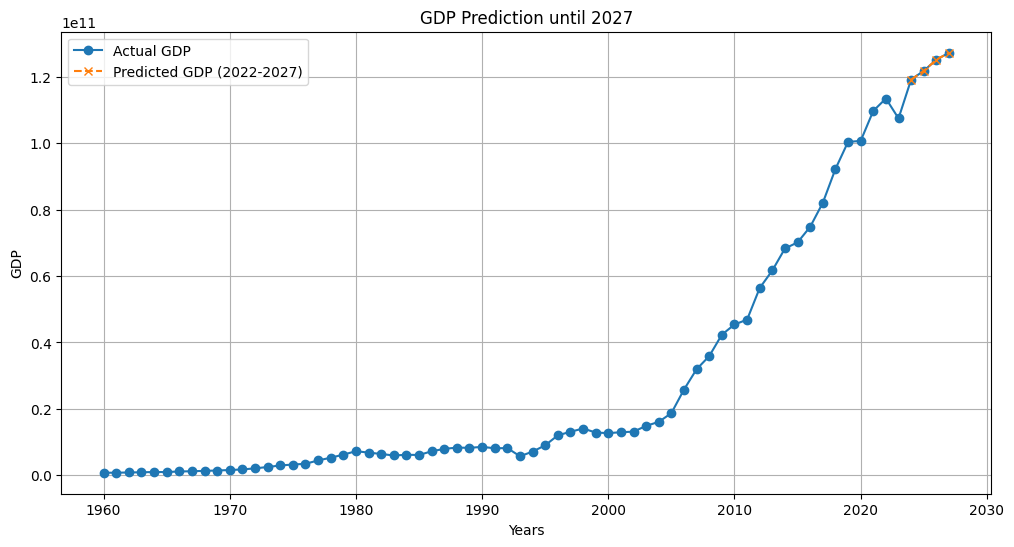

In [40]:
# Plot the actual and predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Years'], combined_df['GDP'], label='Actual GDP', marker='o')
plt.plot(predicted_df['Years'], predicted_df['GDP'], label='Predicted GDP (2022-2027)', linestyle='--', marker='x')
plt.title('GDP Prediction until 2027')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()